##Проверяем работу центральной предельной теоремы 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

## [Распределение Парето на Wiki](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D0%B0%D1%80%D0%B5%D1%82%D0%BE)
### [scipy.stats.pareto](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pareto.html#scipy.stats.pareto)
### Математическое ожидание:  $$ \mu\;=\;\frac{\mathcal{kx}}{\mathcal k-1} ,  \mathcal k\;>\;1 $$
### Дисперсия: $$ \delta^2\;=\;\left(\frac{\mathcal x}{\mathcal k-1}\right)^2\;\times\;\left(\frac{\mathcal k}{\mathcal k-2}\right) , \mathcal k\;>\;2 $$
 
[полезная ссылка - конструктор LaTex формул](http://www.wiris.com/editor/demo/en/developers#mathml-latex)

In [2]:
k=3
x_m=1
pareto_rv = sts.pareto(b=k, scale=x_m)       # формируем распределение Парето , где k = 3, x = 1
sample = pareto_rv.rvs(1000)      # выборка 1000 элементов из этого распределения

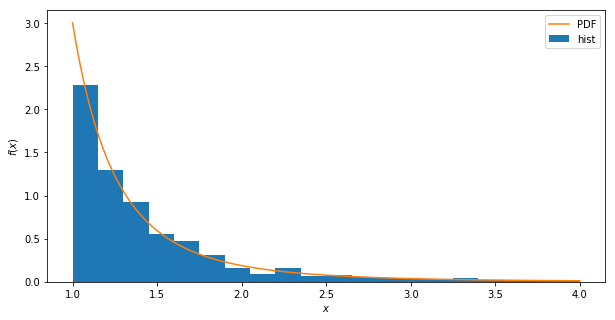

In [3]:
# рисуем гистограмму нашей выборки и поверх нее теоретическую плотность распределения 

x = np.linspace(1,4,1000)
pdf = pareto_rv.pdf(x)         # теоретическая плотность

plt.figure(figsize=(10,5))     

plt.hist(sample,20,range=[1,4], density=True,label='hist')  
plt.plot(x, pdf, label='PDF') 

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend();

 

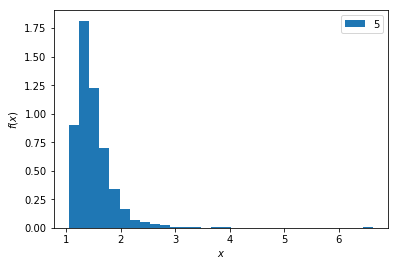

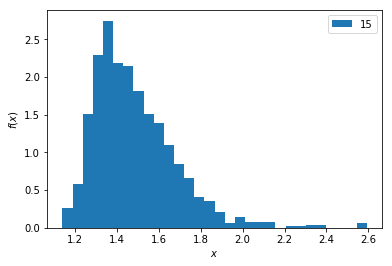

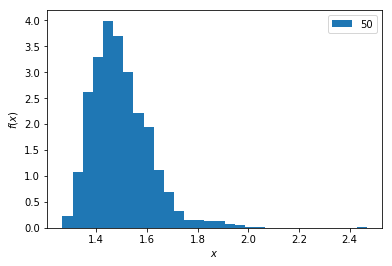

In [8]:
#генерируем 1000 выборок по n элементов
for n in [5,15,50]:  # где n это 5,15,50
    rnd= [] 
    for i in range(1000):
        rnd.append(pareto_rv.rvs(n))
    rnd_mean = list(map(lambda x : x.mean(), rnd))    # создаем список, с выборочными средними
    plt.subplots()
    plt.hist(rnd_mean,30, density=True,label=n,)  # рисуем гистограммы для выборочных средних
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.legend();
# т.е каждый элемент rnd_mean является средним значением каждой выборки размера "n" из rnd

Заметим, что уже при n=15 распределение начинает быть очень похожим на нормальное.

Теперь реализуем формулу мат.ожидания, дисперсии, а так же среднеквадратическое отклонение нормального распределения, которыми, согласно ЦПТ, будем аппроксимировать выборочные средние:

In [5]:
# функции для расчета теоретических значений

def m(k,x_m):          #мат. ожидание
    m = (k * x_m)/(k-1)  
    return m

def d(k,x_m):          # дисперсия
    d = (( x_m/(k-1) )**2) * (k/(k-2))
    return d

def q(d,n):            #среднеквадратическое отклонение нормального распределения 
    q = (d/n)**(1/2)
    return q

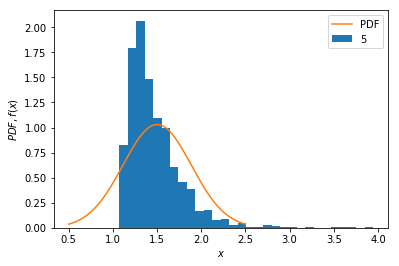

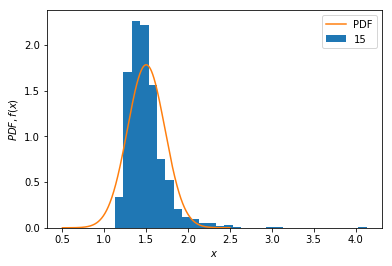

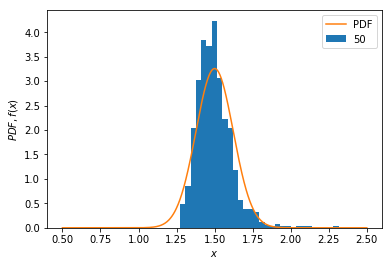

In [11]:


for n in [5,15,50]:   # для каждого n  
    
    # считаем теоретические значения, используя наши функции
    M = m(k,x_m)              
    D = d(k,x_m)
    q_clt = q(D,n)
    
    norml = sts.norm(loc=M, scale = q_clt) # задаем нормальное распределение с нашими теоритическими параметрами 
    x = np.linspace(0.5,2.5,1000)
    pdf = norml.pdf(x)      # плотность нормального распределения

    rnd= []  # формируем выборку по n элементов
    for i in range(1000):
        rnd.append(pareto_rv.rvs(n))
    rnd_mean = list(map(lambda x : x.mean(), rnd))    # создаем список, с выборочными средними
    
    plt.subplots()
    plt.hist(rnd_mean, 30, density=True,label=n)  # рисуем гистограммы для выборочных средних
    plt.plot(x,pdf,label='PDF')
    plt.ylabel('$PDF,f(x)$')
    plt.xlabel('$x$')
    plt.legend();


Подведем итоги.
Распределение Парето, как видно из самой первой гистограмы, сильно смещенно к единице, однако, при росте числа n-элементов случайных выборк, мы наблюдаем как постепенно распределение начинает приобретать форму нормального.
Этот факт наглядно демонстрируется наложением плотности нормального распределения на наши выборки.
